# BigMart Case Study


The data scientists had collected sales data from 1531 products across 8 stores in different cities for the year 2018. Also each product has certain attributes that sets it apart from other products.
<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Item_Identifier</td>
      <td>Unique product ID</td>
    </tr>
    <tr>
      <td>Item_Weight</td>
      <td>Weight of product</td>
    </tr>
     <tr>
      <td>Item_Fat_Content</td>
      <td>Checks the Concentration of fat in the product</td>
    </tr>
    <tr>
      <td>Item_Visibility</td>
      <td>The % of total display area of all similar products in a store</td>
    </tr>
     <tr>
      <td>Item_Type</td>
      <td>Product Category</td>
    </tr>
    <tr>
      <td>Item_MRP</td>
      <td>Maximum Retail Price for a Product</td>
    </tr>
    <tr>
      <td>Outlet_Identifier</td>
      <td>Store ID</td>
    </tr>
     <tr>
      <td>Outlet_Establishment_Year</td>
      <td>The year in which store was established</td>
    </tr>
    <tr>
      <td>Outlet_Size</td>
      <td>The size of the store (Area Size Category)</td>
    </tr>
     <tr>
      <td>Outlet_Location_Type</td>
      <td>In Terms of city Tiers (Size)</td>
    </tr>
    <tr>
      <td>Outlet_Type</td>
      <td>Weight of product</td>
    </tr>
     <tr>
      <td>Item_Identifier</td>
      <td>Grocery store or a type of supermarket</td>
    </tr>
    <tr>
      <td>Item_Outlet_Sales</td>
      <td>Sales of the product In the Specific outlet</td>
    </tr>   
  </tbody>
</table>

# Details of BigMart Case Study

BigMart will try to understand the properties of products and stores which play a key role in increasing sales. 
## Case 1 : For a store outlet OUT035 and OUT045, determine 
    a)	Whether concentration of fat content in the product affect the sales of the products?
    b)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?
## Case 2 : For supermarket type 1 store, determine 
    a)	Whether the location of store in Tier1,Tier2 and Tier3 has any impact on the sales of the product in that store?
    b)	Whether the size of the store (Low, Medium and High) has any impact on the sales of the product in that store?
    c)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?
## Case 3 : For Tier 1 stores, determine
    a)	Whether concentration of fat content in the product affect the sales of the products?
    b)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?


### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


### Load the dataset

In [2]:
df = pd.read_excel(r"D:\DBI\2nd module\forcasting time serias\Big mart Sales Prediction\BigMart_Data.xlsx")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,4706,3932.000000,4706,4706.000000,4706,4706.000000,4706,4706.000000,3348,4706,4706,4706.000000
unique,1526,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDR43,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT045,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,8,NaN,2830,NaN,689,NaN,531,NaN,1502,1834,3134,NaN
mean,NaN,12.955654,NaN,0.066001,NaN,140.743798,NaN,1997.864003,NaN,NaN,NaN,2177.914990
std,NaN,4.655408,NaN,0.051338,NaN,62.387107,NaN,8.299149,NaN,NaN,NaN,1700.556703
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.895000,NaN,0.026950,NaN,93.236350,NaN,1987.000000,NaN,NaN,NaN,838.908000
50%,NaN,12.800000,NaN,0.054367,NaN,142.614100,NaN,1999.000000,NaN,NaN,NaN,1789.670400
75%,NaN,17.100000,NaN,0.094276,NaN,186.083850,NaN,2004.000000,NaN,NaN,NaN,3083.985600


<b> Finding from the Describe</b>

1. Item Weight and Outlet_Size have some missing values because the count is less than total rows.
2. Item_Fat_content have 5 unique values.
3. Item_Type have 16 unique values(which is mensioned in the pblm stmt.
4. Outlet_Identifier have 10 unique values.
5. Outlet_Size and Outlet_Location_Type have 3 unique Values.
6. Outlet_Type have 4 unique values.
7. Minimum value of Item_Visibility is 0 but it is not possible so we will treat it as the NULL value.
8. Variance is very less is Item Visibility and high in Item_MRP also Item_Outlet_Sales.
9. Some outliers are present in the dataset (difference b/w min, max and interquartile range are unequal.
10. Item_Weight is a numerical value so we can substitute the MEAN value to fill the missing values.
11. Outlet_Size is a categorical value so we can use the MODE for missing value.
* There are 1531 products mentioned in the problem statement but we only have the infromation about 1526.

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

We have 7 categorical features : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


### Exploratory Analysis

#### Finding the missing values

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   774
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1358
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Two attribute have missing values ('Item Weight' and 'Outlet_Size')

## Visualzing the data

### 1. Visualzing  Item_Visibility and Item_Outlet_Sales

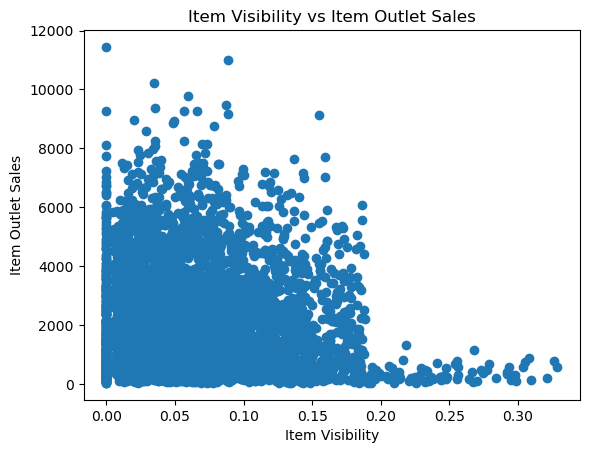

In [7]:
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.title("Item Visibility vs Item Outlet Sales")

plt.show()

<b> We can see that, Items having visibility less than 0.2 sold most </b>

### 2. Visualizing the relationship b/w Outlet and Sales.

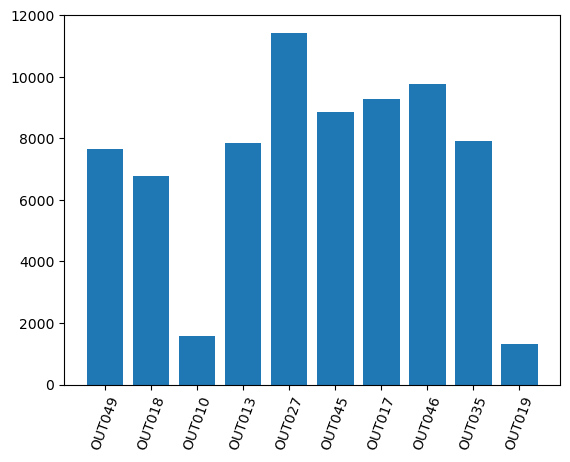

In [8]:
plt.bar(df.Outlet_Identifier,df.Item_Outlet_Sales)
plt.xticks(rotation = 70)
plt.show()

Lets check the outliers also

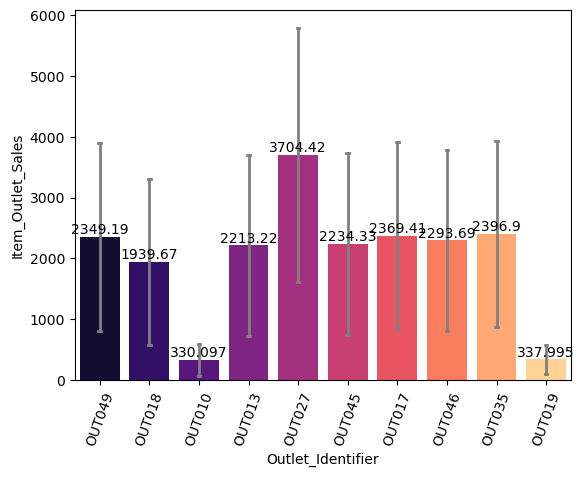

In [9]:
ax=sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=df ,palette='magma',
            capsize = 0.05,saturation = 8,errcolor = 'gray', errwidth = 2,ci = 'sd')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 70)

plt.show()

In the above plot, we can find the top most and least contributed outlets
* Top 3 Contributors   : OUT027,OUT035 and OUT017
* Least 3 Contributors : OUT010,OUT019 and OUT018

### 3. Item_Type and Sales 

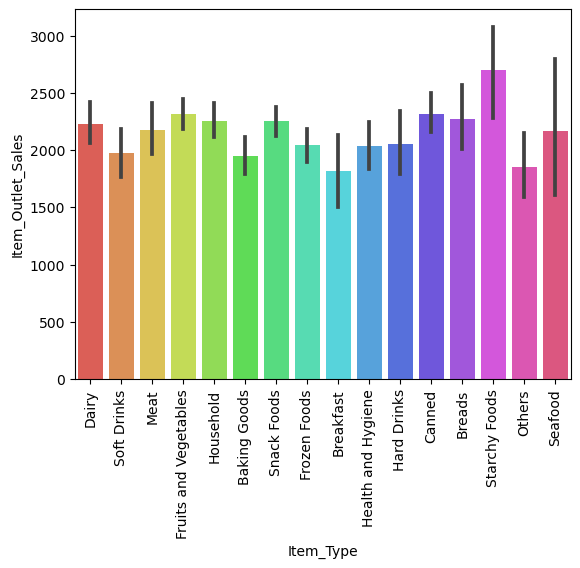

In [10]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

The most sold item type is <b> Starchy Foods </b>.

#### Finding the outliers of the each item type.

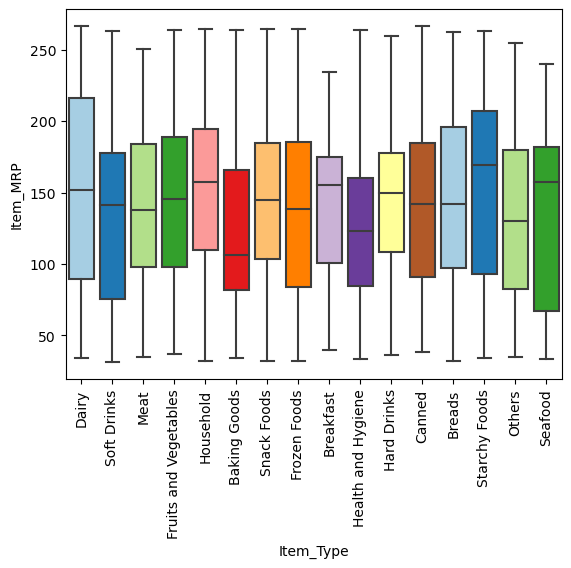

In [11]:
sns.boxplot(x='Item_Type',y='Item_MRP',data=df,palette='Paired',saturation=8)
plt.xticks(rotation=90)
plt.show()

No outliers in the item types.

### 4.  Item_Fat_Content and MRP.

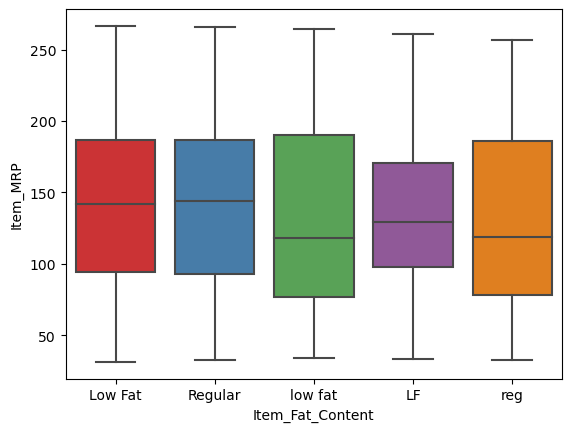

In [12]:
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=df, palette="Set1")
plt.show()

Here we can see the Low Fat and low fat and LF are Low Fat.

Also, Regular and reg are Regular.

#### Finding the unique values

### 1. Finding the Item Weight Missing Values.

In [13]:
df["Item_Weight"].describe()

count    3932.000000
mean       12.955654
std         4.655408
min         4.555000
25%         8.895000
50%        12.800000
75%        17.100000
max        21.350000
Name: Item_Weight, dtype: float64

In [14]:
# filling NAN value with median group by the Item_Identifier                 
df["Item_Weight"].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('median'), inplace = True)
print("After Filling Item Weight using Item_Identifier",df["Item_Weight"].isnull().sum())
df["Item_Weight"].fillna(df.groupby('Item_Type')['Item_Weight'].transform('median'), inplace = True)
print("After Filling Item Weight using Item_Type",df["Item_Weight"].isnull().sum())


After Filling Item Weight using Item_Identifier 34
After Filling Item Weight using Item_Type 0


### 2. Cleaning the Item_Visibility Values



Each Outlet type have same pattern of Item Visibility. 

Every item have placed same or near. So we can take median of Item_Visibility of Item_Identifier group by Outlet_Type for filling the NAN values.

Also every items of each Item_Type place together or near to each other (like fruits and vegtables are placed together , drinks, electric items etc) so we can take the median of the Item_visibility of item_Type group by outlet type.

In [15]:
# filling NAN value with median group by the Item_Identifier   and Outlet_Type              
df["Item_Visibility"]=df["Item_Visibility"].replace(0,np.nan)
print("Before Filling Item_Visibility : ",df["Item_Visibility"].isnull().sum())
df["Item_Visibility"].fillna(df.groupby(['Item_Identifier','Outlet_Type'])['Item_Visibility'].transform('median'), inplace = True)
print("After Filling Item_Visibility tusing groupby ['Item_Identifier','Outlet_Type'] : ",df["Item_Visibility"].isnull().sum())
# filling NAN value with median group by the Item_Type and Outlet_Type            
df["Item_Visibility"].fillna(df.groupby(['Item_Type','Outlet_Type'])['Item_Visibility'].transform('median'), inplace = True)
print("After Filling Item_Visibility using groupby ['Item_Type','Outlet_Type'] : ",df["Item_Visibility"].isnull().sum())


Before Filling Item_Visibility :  284
After Filling Item_Visibility tusing groupby ['Item_Identifier','Outlet_Type'] :  115
After Filling Item_Visibility using groupby ['Item_Type','Outlet_Type'] :  0


In [16]:
df["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.102280
4       0.013217
          ...   
4701    0.087159
4702    0.027756
4703    0.092590
4704    0.029569
4705    0.077428
Name: Item_Visibility, Length: 4706, dtype: float64

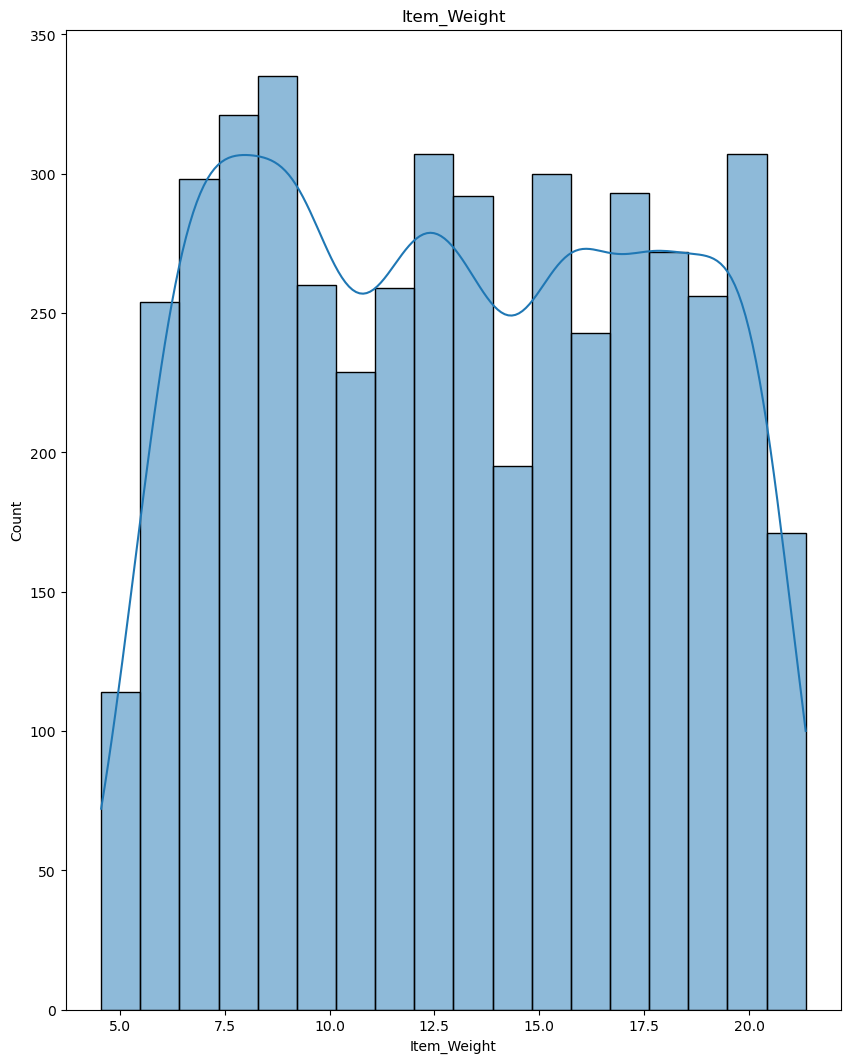

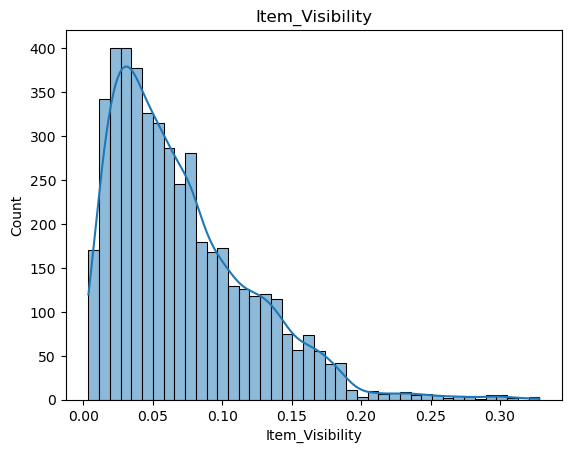

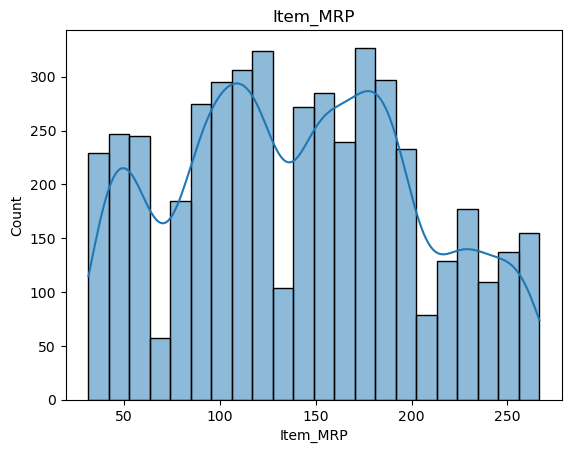

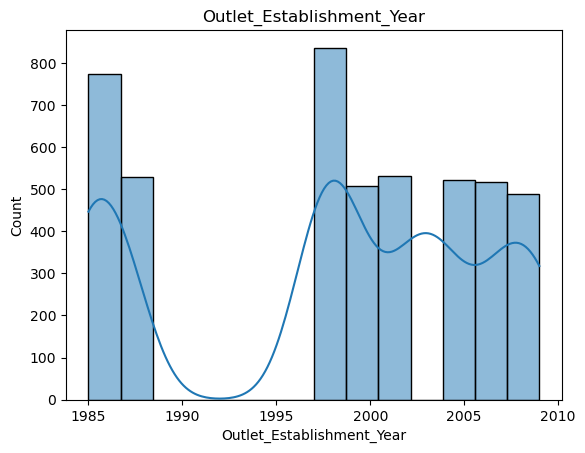

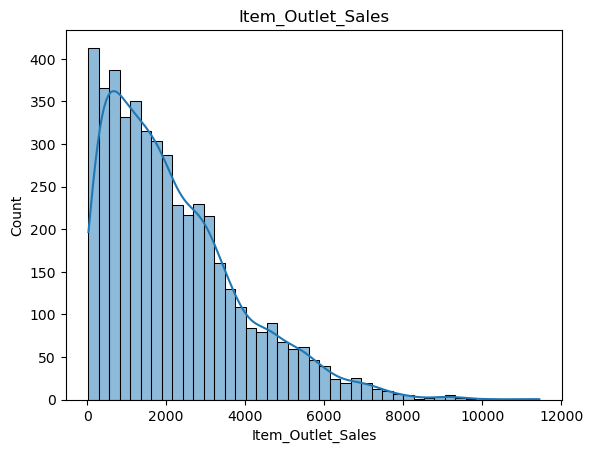

In [17]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_features:
    sb.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()



## Categorical Variables
#### 3 . Filling the Outlet_Size NAN values

Outlet Size depends on outlet type and the location of the outlet.

In [18]:
nan_rows = df.loc[df['Outlet_Size'].isna(), ['Outlet_Type', 'Outlet_Location_Type']]

# Printing unique values of Outlet_Type and Outlet_Location_Type
unique_outlet_type = nan_rows['Outlet_Type'].unique()
unique_outlet_location_type = nan_rows['Outlet_Location_Type'].unique()

print("Unique Outlet_Type values for Outlet_Size NaN:")
print(unique_outlet_type)
print("Unique Outlet_Location_Type values for Outlet_Size NaN:")
print(unique_outlet_location_type)


Unique Outlet_Type values for Outlet_Size NaN:
['Grocery Store' 'Supermarket Type1']
Unique Outlet_Location_Type values for Outlet_Size NaN:
['Tier 3' 'Tier 2']


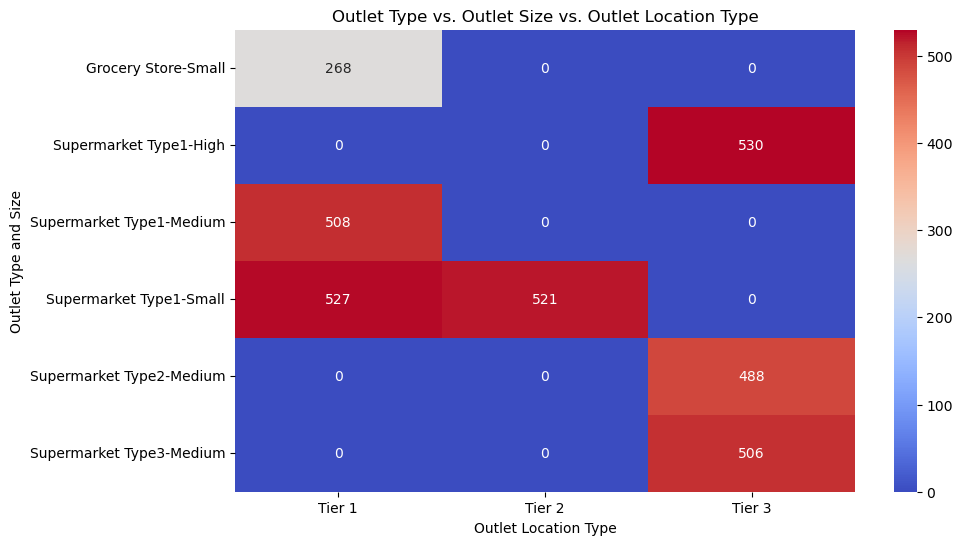

In [19]:
cross_table = pd.crosstab([df['Outlet_Type'], df['Outlet_Size']], df['Outlet_Location_Type'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Outlet Type vs. Outlet Size vs. Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Outlet Type and Size')
plt.show()

In [20]:
crosstable=pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,530,0,0
Medium,0,508,488,506
Small,268,1048,0,0


<b> Here we can see, that all the grocery stores are small types, that is true.</b>
    
 <b>   So we are going to mapping the grocery store and small size.</b>

Change the NAN Value of Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.


In [21]:
df.Outlet_Size.value_counts()

Medium    1502
Small     1316
High       530
Name: Outlet_Size, dtype: int64

In [22]:
#df.loc[df['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'] = df.loc[df['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'].fillna('Small')
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode().iloc[0]))


In [23]:
df.Outlet_Size.value_counts()

Small     2674
Medium    1502
High       530
Name: Outlet_Size, dtype: int64

In [24]:
df['Outlet_Size'].isnull().sum(axis=0)

0

### Checking Categorical Values

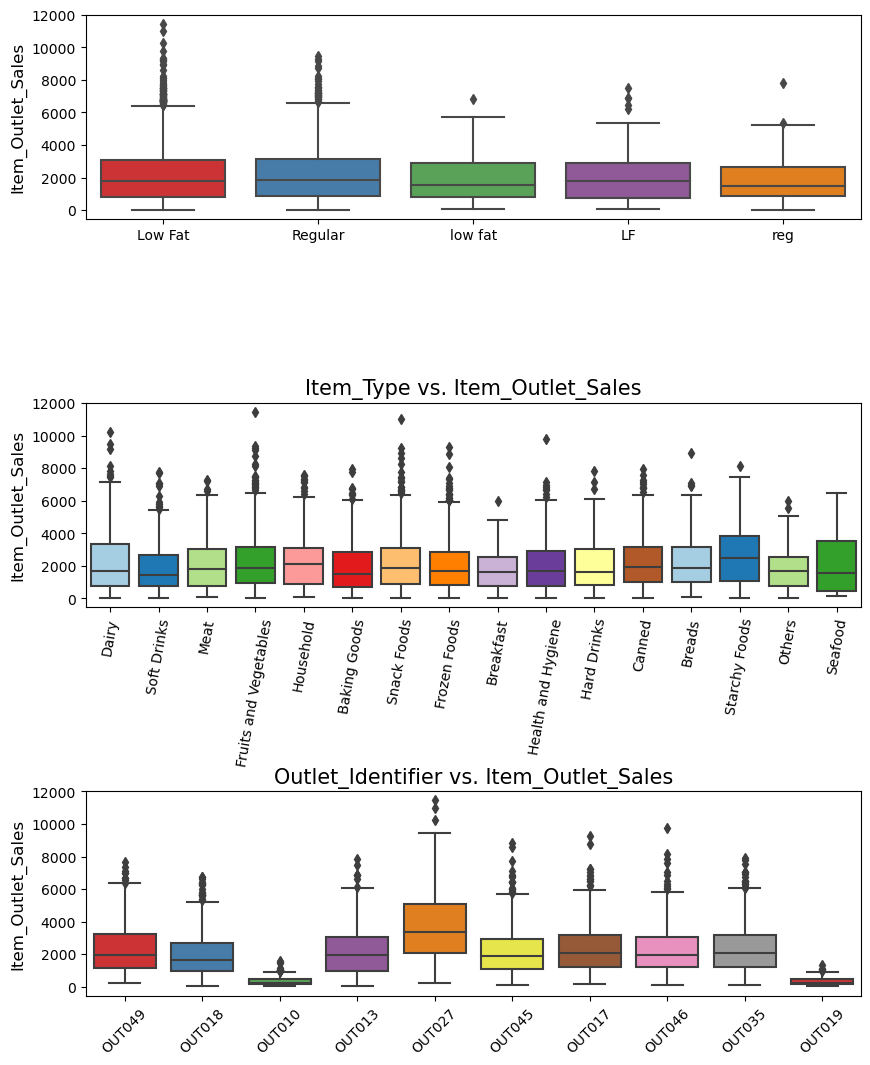

In [25]:
plt.figure(figsize = (10,9))
plt.subplot(311)
ax=sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, palette="Set1")
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

#plt.figure(figsize = (10,9))
plt.subplot(312)
ax=sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette="Paired",saturation=8)
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust( hspace = 0.9,top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=80)

plt.subplot(313)
ax=sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(wspace = 0.4, hspace = 0.9,top = 1.2)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()


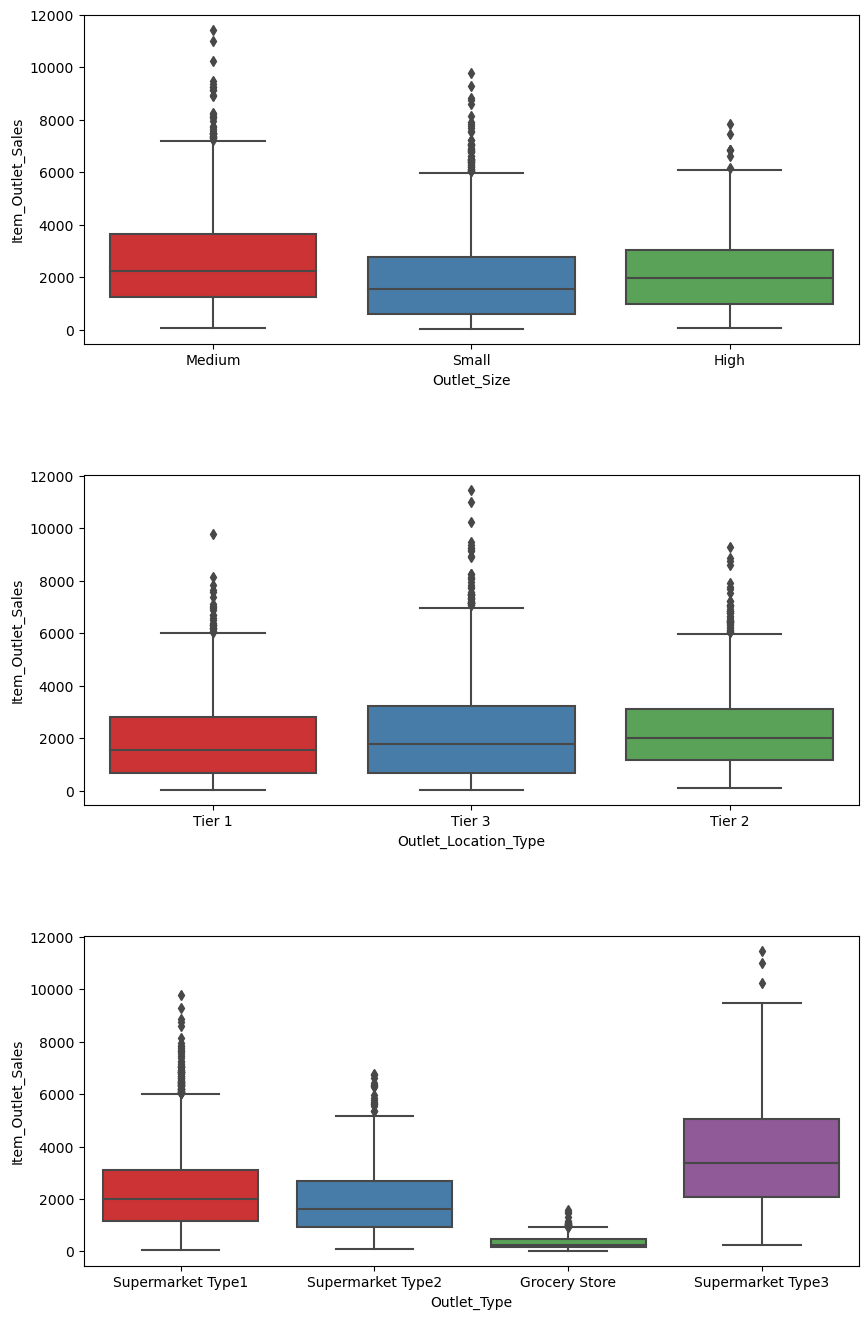

In [26]:
plt.figure(figsize = (10,9))
plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

### 4 . Creating new Feature

Item_type Variable has 16 categories which is very useful for analysis. So its a good idea to combine them. For this , when we look into the Item_Identifier, it start with either FD,DR or NC. If we check this categories, these look like Food,Drink and Non-Consumables. So we can use the Item_Identifier to create a feature Called Item_Category.

In [27]:
# str[:n] is used to get first n characters of column in pandas.
# map is used to substitute each value in a Series with another value

df['Item_Category']=df['Item_Identifier'].str[:2].map({'FD' : 'Food',
                                                       'NC' : 'Non-Consumable',
                                                       'DR' : 'Drinks'})
df['Item_Category'].value_counts()
df[['Item_Category','Item_Type']]

,Item_Category,Item_Type
0,Food,Dairy
1,Drinks,Soft Drinks
2,Food,Meat
3,Food,Fruits and Vegetables
4,Non-Consumable,Household
...,...,...
4701,Food,Dairy
4702,Food,Baking Goods
4703,Non-Consumable,Household
4704,Non-Consumable,Household


### 5. Modify the Item_Fat_Content

When we check the Item_Fat_Content vs Outlet_Sales box chart, we found out thier is some typo error.
This can be corrected as : Low Fat,low fat, LF as same which is Low Fat,Regular and reg are same.

In [28]:
print("Unique Values ",df['Item_Fat_Content'].nunique())
df['Item_Fat_Content'] =df['Item_Fat_Content'].replace({ 'LF' : 'Low Fat',
                                                         'reg' : 'Regular',
                                                          'low fat' : 'Low Fat'})
print("After Modifying Unique Values ",df['Item_Fat_Content'].nunique())

print(df['Item_Fat_Content'].value_counts())

Unique Values  5
After Modifying Unique Values  2
Low Fat    3058
Regular    1648
Name: Item_Fat_Content, dtype: int64


In the above, when creating new category 'Item_Category' we saw that it contains <b>Non-Consumable</b>. But we now a fat-content should not be specified for them. So we need to create seperate category for such kind of observations. So we will chage the Item_Fat_Content for Non-Consumable as <b>Non-Edible</b>.

In [29]:
df.loc[df['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()


Low Fat       2215
Regular       1648
Non-Edible     843
Name: Item_Fat_Content, dtype: int64

In [30]:
#import dtale

In [31]:
#dtale.show(df)

## EDA using klib Library

In [32]:
!pip install klib

In [33]:
import klib

GridSpec(6, 8)

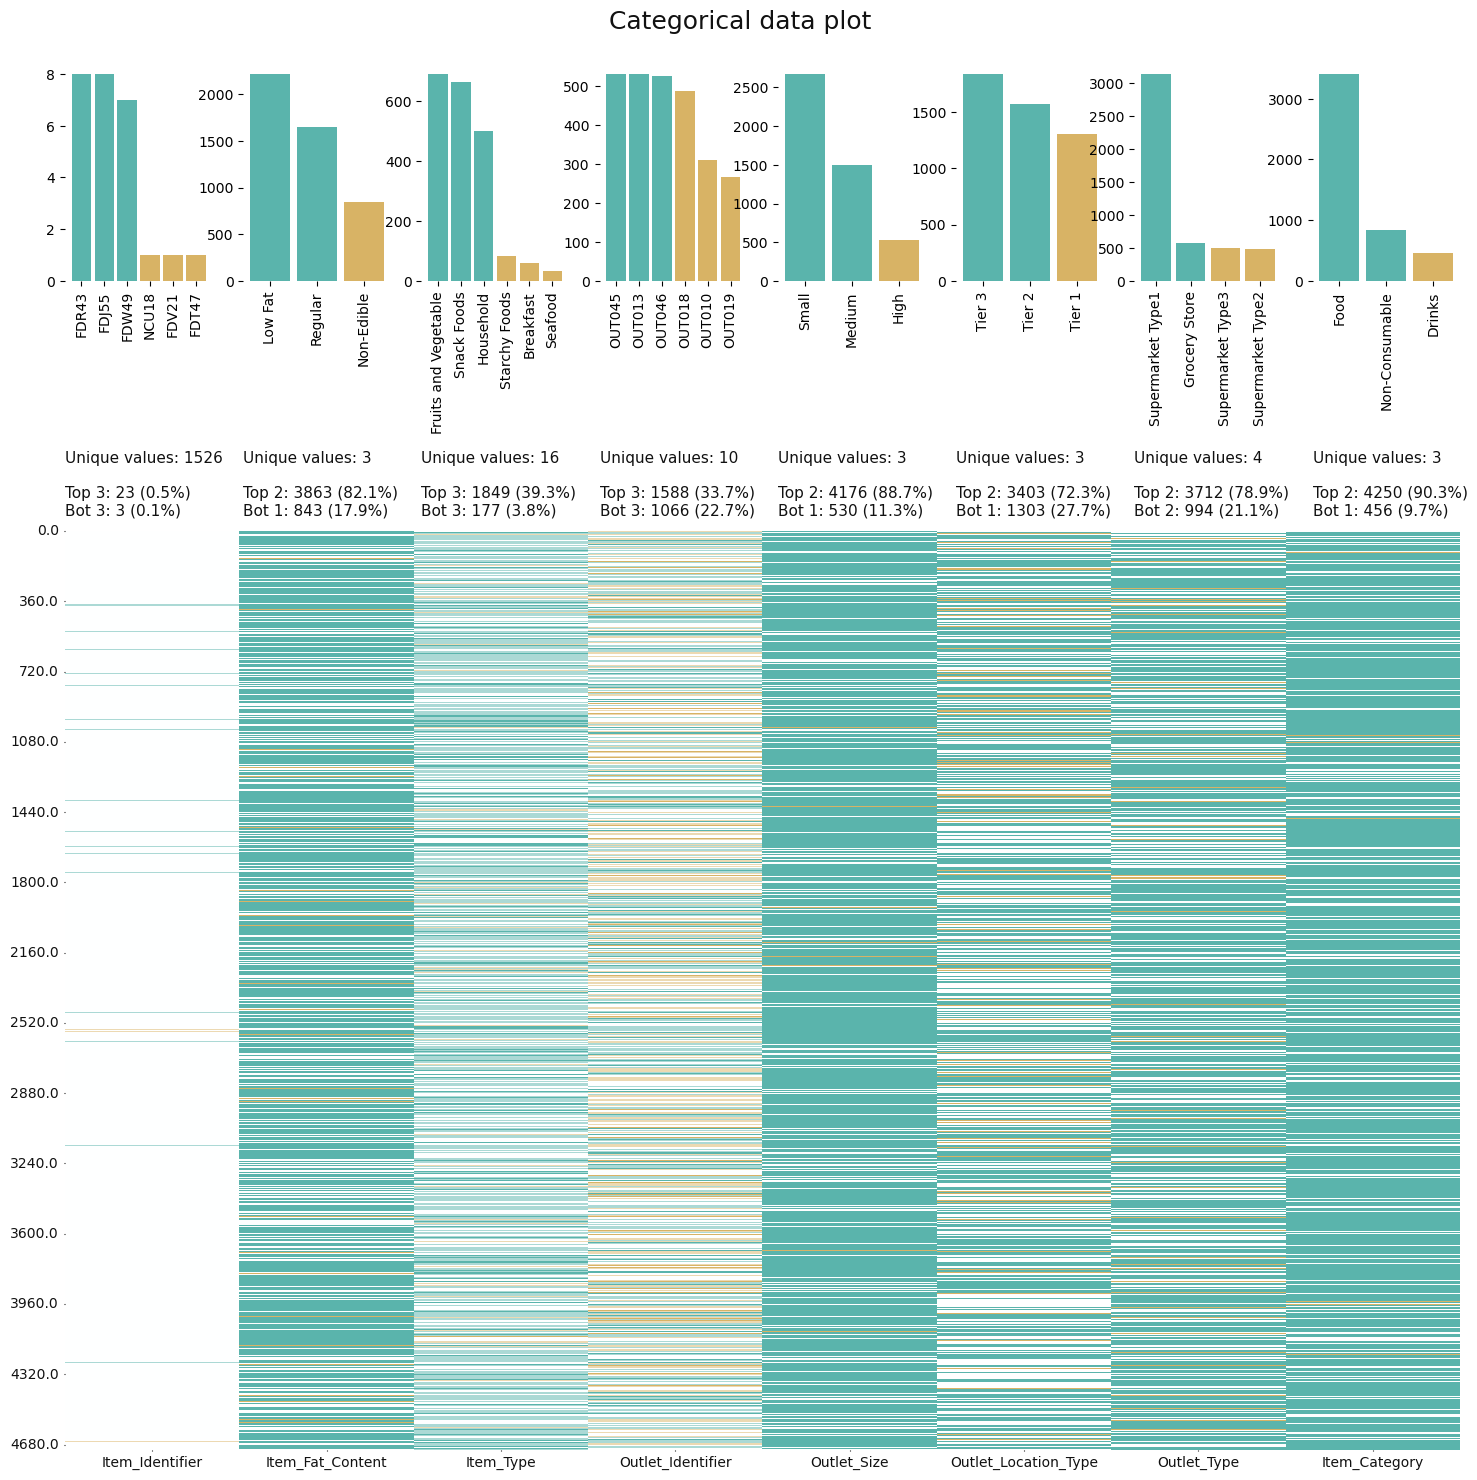

In [34]:
klib.cat_plot(df)

In [35]:
#klib.corr_mat(df)

### Data Cleaning

In [36]:
klib.convert_datatypes(df)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939,Food
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791,Drinks
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020,Food
3,FDX07,19.200001,Regular,0.102280,Fruits and Vegetables,182.095001,OUT010,1998,Small,Tier 3,Grocery Store,732.380005,Food
4,NCD19,8.930000,Non-Edible,0.013217,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,FDA50,16.250000,Low Fat,0.087159,Dairy,95.140999,OUT035,2004,Small,Tier 2,Supermarket Type1,2220.443115,Food
4702,FDS48,15.150000,Low Fat,0.027756,Baking Goods,150.470795,OUT013,1987,High,Tier 3,Supermarket Type1,2106.591309,Food
4703,NCH07,13.150000,Non-Edible,0.092590,Household,159.560394,OUT013,1987,High,Tier 3,Supermarket Type1,1901.524780,Non-Consumable
4704,NCK54,12.150000,Non-Edible,0.029569,Household,117.614998,OUT013,1987,High,Tier 3,Supermarket Type1,1514.694946,Non-Consumable


In [37]:
 klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.102280,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,FDA50,16.25,Low Fat,0.087159,Dairy,95.1410,OUT035,2004,Small,Tier 2,Supermarket Type1,2220.4430,Food
4702,FDS48,15.15,Low Fat,0.027756,Baking Goods,150.4708,OUT013,1987,High,Tier 3,Supermarket Type1,2106.5912,Food
4703,NCH07,13.15,Non-Edible,0.092590,Household,159.5604,OUT013,1987,High,Tier 3,Supermarket Type1,1901.5248,Non-Consumable
4704,NCK54,12.15,Non-Edible,0.029569,Household,117.6150,OUT013,1987,High,Tier 3,Supermarket Type1,1514.6950,Non-Consumable


In [38]:
klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information


,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,pooled_vars
0,FDA15,9.30,0.016047,249.8092,3735.1380,0
1,DRC01,5.92,0.019278,48.2692,443.4228,1
2,FDN15,17.50,0.016760,141.6180,2097.2700,2
3,FDX07,19.20,0.102280,182.0950,732.3800,3
4,NCD19,8.93,0.013217,53.8614,994.7052,4
...,...,...,...,...,...,...
4701,FDA50,16.25,0.087159,95.1410,2220.4430,19
4702,FDS48,15.15,0.027756,150.4708,2106.5912,267
4703,NCH07,13.15,0.092590,159.5604,1901.5248,4
4704,NCK54,12.15,0.029569,117.6150,1514.6950,4


##  Hypothesis Testing

BigMart will try to understand the properties of products and stores which play a key role in increasing sales. 
## Case 1 : For a store outlet OUT035 and OUT045, determine 
    a)	Whether concentration of fat content in the product affect the sales of the products?
    b)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?
## Case 2 : For supermarket type 1 store, determine 
    a)	Whether the location of store in Tier1,Tier2 and Tier3 has any impact on the sales of the product in that store?
    b)	Whether the size of the store (Low, Medium and High) has any impact on the sales of the product in that store?
    c)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?
## Case 3 : For Tier 1 stores, determine
    a)	Whether concentration of fat content in the product affect the sales of the products?
    b)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?


### Case 1:
First we will check for all outlet Then check for the OUT035 and OUT045

#### Hypothesis for general Concentration of fat

Null Hypothesis (H0): The concentration of fat content in the product does not affect the sales of the products 

Alternative Hypothesis (H1): The concentration of fat content in the product does affect the sales of the products 


In [39]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Category                 object
dtype: object

In [40]:
# for all outlets

# Convert data to numpy arrays
#sales = np.array(df['Item_Outlet_Sales'])

# Perform t-test
lowfat_sales = df.loc[df['Item_Fat_Content'] == 'Low Fat', 'Item_Outlet_Sales']
Regular_sales = df.loc[df['Item_Fat_Content'] == 'Regular', 'Item_Outlet_Sales']

t_statistic, p_value = stats.ttest_ind(lowfat_sales, Regular_sales)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -1.453623113138627
P-Value: 0.14613209946796013


The t-statistic measures the difference between the means of the two groups: low fat and regular. In this case, the negative t-statistic (-1.453623113138627) suggests that the mean sales for the low-fat items are lower than the mean sales for the regular items.

The p-value represents the probability of observing the data or more extreme data if the null hypothesis is true. In this case, the p-value is 0.14613209946796013, which is greater than the typical significance level of 0.05.

Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This means that based on the available evidence, we do not have sufficient statistical evidence to conclude that there is a significant difference in sales between low-fat and regular items.

In summary, the analysis suggests that there is no significant difference in sales between low-fat and regular items

#### for outlet OUT035 and OUT045

#### Hypothesis for general Concentration of fat

Null Hypothesis (H0): The concentration of fat content in the product does not affect the sales of the products for outlets OUT035 and OUT045 

Alternative Hypothesis (H1): The concentration of fat content in the product does affect the sales of the products for outlets OUT035 and OUT045

In [41]:
lowfat_sales = df.loc[(df['Item_Fat_Content'] == 'Low Fat') & ((df['Outlet_Identifier'] == 'OUT035') | (df['Outlet_Identifier'] == 'OUT045')), 'Item_Outlet_Sales']
Regular_sales = df.loc[(df['Item_Fat_Content'] == 'Regular') & ((df['Outlet_Identifier'] == 'OUT035') | (df['Outlet_Identifier'] == 'OUT045')), 'Item_Outlet_Sales']

t_statistic, p_value = stats.ttest_ind(lowfat_sales, Regular_sales)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -1.9880070517125628
P-Value: 0.047123945306226385


The t-statistic measures the difference between the means of the two groups: low fat and regular. In this case, the negative t-statistic (-1.9880070517125628) indicates that the mean sales for low-fat items are lower than the mean sales for regular items in outlets OUT035 and OUT045.

The p-value represents the probability of observing the data or more extreme data if the null hypothesis is true. In this case, the p-value is 0.047123945306226385, which is below the significance level of 0.05.

Since the p-value is less than 0.05, we can reject the null hypothesis. This suggests that there is a significant difference in sales between low-fat and regular items for outlets OUT035 and OUT045.

In summary, the analysis provides evidence to suggest that the concentration of fat content in the product affects the sales of the products for outlets OUT035 and OUT045.

### Case 1 :     
b)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?

Null Hypothesis (H0): The independent variables (item visibility, item MRP, item weight, and fat concentration) have no significant impact on the sales of the products.

Alternative Hypothesis (H1): At least one of the independent variables (item visibility, item MRP, item weight, or fat concentration) has a significant impact on the sales of the products.

In [42]:
# Define the ANOVA formula
formula = 'Item_Outlet_Sales ~ C(Item_Fat_Content) + Item_Visibility + Item_MRP + Item_Weight'

# Filter the data for the specific outlet
outlet_df = df[(df['Outlet_Identifier'] == 'OUT035') | (df['Outlet_Identifier'] == 'OUT045')]

# Fit the ANOVA model
model = ols(formula, data=outlet_df).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(Item_Fat_Content)  3.529745e+06     2.0    1.371694   2.541327e-01
Item_Visibility      4.289983e+06     1.0    3.334262   6.813582e-02
Item_MRP             1.048721e+09     1.0  815.086815  4.988200e-133
Item_Weight          3.281731e+05     1.0    0.255063   6.136390e-01
Residual             1.345822e+09  1046.0         NaN            NaN


C(Item_Fat_Content): This row represents the categorical variable "Item_Fat_Content." The sum_sq column shows the sum of squares attributed to this variable, indicating the variability in sales explained by fat content. The df column represents the degrees of freedom associated with fat content. The F column displays the F-value, which tests the overall significance of fat content on sales. The PR(>F) column shows the p-value, indicating the probability of obtaining the observed results or more extreme results if the null hypothesis (no effect of fat content on sales) is true. In this case, the p-value is 0.2543, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that fat content does not have a significant impact on sales for the specific outlet.

Item_Visibility: In this case, the p-value is 0.0623, which is slightly greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that item visibility may not have a significant impact on sales for the specific outlet.

Item_MRP: The p-value is significantly small (e.g., 4.613172e-133), indicating that item MRP has a highly significant impact on sales for the specific outlet.

Item_Weight: The p-value is 0.6120, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that item weight does not have a significant impact on sales for the specific outlet.

Residual: This row represents the residual, which represents the unexplained variability in sales. The sum_sq column shows the sum of squares of the residuals. The df column represents the degrees of freedom associated with the residuals. Since the F-value and p-value for the residuals are not applicable, the values are marked as NaN (not a number).

In summary, according to the ANOVA table, item MRP has a significant impact on sales, while fat content, item visibility, and item weight do not have a significant impact for the specific outlet.

### Case 2 : For supermarket type 1 store, determine
a)    Whether the location of store in Tier1,Tier2 and Tier3 has any impact on the sales of the product in that store?

Null Hypothesis (H0): The location of the store (Tier 1, Tier 2, and Tier 3) has no significant impact on the sales of the product.

Alternative Hypothesis (H1): The location of the store (Tier 1, Tier 2, or Tier 3) has a significant impact on the sales of the product.

In [43]:
df['Outlet_Location_Type']

0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
4701    Tier 2
4702    Tier 3
4703    Tier 3
4704    Tier 3
4705    Tier 1
Name: Outlet_Location_Type, Length: 4706, dtype: object

In [44]:
store_df = df[(df['Outlet_Type'] == 'Supermarket Type1')]

# Extract sales data for each store location
tier1_sales = store_df.loc[store_df['Outlet_Location_Type'] == 'Tier 1', 'Item_Outlet_Sales']
tier2_sales = store_df.loc[store_df['Outlet_Location_Type'] == 'Tier 2', 'Item_Outlet_Sales']
tier3_sales = store_df.loc[store_df['Outlet_Location_Type'] == 'Tier 3', 'Item_Outlet_Sales']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(tier1_sales, tier2_sales, tier3_sales)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 1.2799258783243226
P-Value: 0.2782033547927019


the output indicates that there is a no significant difference in the sales of the products among the different store locations of supermarket type 1.

### Case 2 : For supermarket type 1 store, determine

b)    Whether the size of the store (Small, Medium and High) has any impact on the sales of the product in that store?

Null Hypothesis (H0): The size of the store has no significant impact on the sales of the product.

Alternative Hypothesis (H1): The size of the store has a significant impact on the sales of the product.

In [45]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
4701     Small
4702      High
4703      High
4704      High
4705     Small
Name: Outlet_Size, Length: 4706, dtype: object

In [46]:
# Extract sales data for each store size
low_sales = store_df.loc[store_df['Outlet_Size'] == 'Small', 'Item_Outlet_Sales']
medium_sales = store_df.loc[store_df['Outlet_Size'] == 'Medium', 'Item_Outlet_Sales']
high_sales = store_df.loc[store_df['Outlet_Size'] == 'High', 'Item_Outlet_Sales']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(low_sales, medium_sales, high_sales)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 1.3217612197709454
P-Value: 0.26681398517770016


we cannot reject the null hypothesis, which suggests that there is no significant difference in the sales of the product among the different sizes of the store (Small, Medium, and High) in supermarket type1.

### Case 2 : For supermarket type 1 store, determine
c)    Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?

Null Hypothesis (H0): The independent variables (item visibility, item MRP, item weight, and fat concentration) have no significant impact on the sales of the products.

Alternative Hypothesis (H1): At least one of the independent variables (item visibility, item MRP, item weight, or fat concentration) has a significant impact on the sales of the products.

In [47]:
# Define the ANOVA formula
formula = 'Item_Outlet_Sales ~ C(Item_Fat_Content) + Item_Visibility + Item_MRP + Item_Weight'

# Fit the ANOVA model
model = ols(formula, data=store_df).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                           sum_sq      df            F    PR(>F)
C(Item_Fat_Content)  4.555697e+06     2.0     1.818106  0.162504
Item_Visibility      5.485012e+06     1.0     4.377961  0.036487
Item_MRP             3.289356e+09     1.0  2625.458890  0.000000
Item_Weight          3.399232e+06     1.0     2.713159  0.099624
Residual             3.918974e+09  3128.0          NaN       NaN


Interpreting the results for supermarket type 1:

For the independent variable "Item_Fat_Content," the F-statistic is 1.819084 with a corresponding p-value of 0.162346. This suggests that the "Item_Fat_Content" variable does not have a significant impact on the sales of the products at a conventional significance level (e.g., 0.05). The p-value is greater than 0.05.
For the independent variable "Item_Visibility," the F-statistic is 4.398531 with a corresponding p-value of 0.036050. This suggests that the "Item_Visibility" variable has a significant impact on the sales of the products at a conventional significance level. The p-value is less than 0.05.
For the independent variable "Item_MRP," the F-statistic is 2625.523749 with a corresponding p-value of 0.000000. This indicates that the "Item_MRP" variable has a highly significant impact on the sales of the products. The p-value is very close to zero.
For the independent variable "Item_Weight," the F-statistic is 2.711488 with a corresponding p-value of 0.099728. This suggests that the "Item_Weight" variable does not have a significant impact on the sales of the products at a conventional significance level. The p-value is greater than 0.05.


## Case 3 : For Tier 1 stores, determine
    a)	Whether concentration of fat content in the product affect the sales of the products?
    Null Hypothesis (H0): The concentration of fat content in the product does not have a significant impact on the sales of the products.

    Alternative Hypothesis (H1): The concentration of fat content in the product has a significant impact on the sales of the products
   


In [48]:
tier1_df = df[(df['Outlet_Location_Type'] == 'Tier 1')]

lowfat_sales = tier1_df.loc[(tier1_df['Item_Fat_Content'] == 'Low Fat'), 'Item_Outlet_Sales']
Regular_sales = tier1_df.loc[(tier1_df['Item_Fat_Content'] == 'Regular'), 'Item_Outlet_Sales']

t_statistic, p_value = stats.ttest_ind(lowfat_sales, Regular_sales)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -1.8442658988307497
P-Value: 0.06541941349461503


 larger P-Value, such as 0.06541941349461503, suggests weak evidence against the null hypothesis and indicates that the concentration of fat content in the product may not have a significant impact on the sales of the products.

### Case 3 : For Tier 1 stores, determine
     b) Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?
     Null Hypothesis (H0): The independent variables (item visibility, item MRP, item weight, and fat concentration) have no significant impact on the sales of the products.

    Alternative Hypothesis (H1): At least one of the independent variables (item visibility, item MRP, item weight, or fat concentration) has a significant impact on the sales of the products.
     

In [49]:
# Define the ANOVA formula
formula = 'Item_Outlet_Sales ~ C(Item_Fat_Content) + Item_Visibility + Item_MRP + Item_Weight'

# Fit the ANOVA model
model = ols(formula, data=tier1_df).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(Item_Fat_Content)  2.556988e+06     2.0    0.775439   4.607148e-01
Item_Visibility      1.494731e+08     1.0   90.659268   8.022614e-21
Item_MRP             9.718965e+08     1.0  589.480149  1.197685e-107
Item_Weight          3.985330e+06     1.0    2.417205   1.202529e-01
Residual             2.138409e+09  1297.0         NaN            NaN


Interpreting the results for Tier 1:

For the independent variable "Item_Fat_Content," the F-statistic is 0.772319 with a corresponding p-value of 0.462153. This suggests that the "Item_Fat_Content" variable does not have a significant impact on the sales of the products at a conventional significance level (e.g., 0.05). The p-value is greater than 0.05.

For the independent variable "Item_Visibility," the F-statistic is 91.479026 with a corresponding p-value of 5.447543e-21. This suggests that the "Item_Visibility" variable has a significant impact on the sales of the products at a conventional significance level. The p-value is very small, close to zero.

For the independent variable "Item_MRP," the F-statistic is 589.238420 with a corresponding p-value of 1.301651e-107. This indicates that the "Item_MRP" variable has a highly significant impact on the sales of the products. The p-value is very close to zero.

For the independent variable "Item_Weight," the F-statistic is 2.451562 with a corresponding p-value of 0.117652. This suggests that the "Item_Weight" variable does not have a significant impact on the sales of the products at a conventional significance level. The p-value is greater than 0.05.

# Dealing with the Categorical Data

#### Label Encoding 

We need to encode categorical data 
In this data set we have 2 type of categorical data:
* Nominal Categorical data
    - Item_Identifier(not using in this data for any model)
    - Item_Type
    - Outlet_Identifier
    - Item_Category
    - Item_Fat_Content
* Ordinal Categorical data
    - Outlet_Size
    - Outlet_Location_Type
    - Outlet_Type
    
 we can use one-hot encoding for the categorical data and OrdinalEncoding for ordinal data

##### Ordinal Encoding:

In [50]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

###### 1.Encoding Outlet_Size

In [51]:
df['Outlet_Size'].value_counts()


Small     2674
Medium    1502
High       530
Name: Outlet_Size, dtype: int64

In [52]:
#creating object of OrdinalEncoding

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the 'Outlet_Size' column and transform it to numerical labels
df['Outlet_Size'] = label_encoder.fit_transform(df['Outlet_Size'])


In [53]:
#fit and transform train data
#le = LabelEncoder()
#data = df
#data['Outlet_Size']=encoder.fit_transform(df[['Outlet_Size']])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.102280,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.013217,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,FDA50,16.25,Low Fat,0.087159,Dairy,95.1410,OUT035,2004,2,Tier 2,Supermarket Type1,2220.4430,Food
4702,FDS48,15.15,Low Fat,0.027756,Baking Goods,150.4708,OUT013,1987,0,Tier 3,Supermarket Type1,2106.5912,Food
4703,NCH07,13.15,Non-Edible,0.092590,Household,159.5604,OUT013,1987,0,Tier 3,Supermarket Type1,1901.5248,Non-Consumable
4704,NCK54,12.15,Non-Edible,0.029569,Household,117.6150,OUT013,1987,0,Tier 3,Supermarket Type1,1514.6950,Non-Consumable


###### 3. Encoding Outlet_Location_Type

In [54]:
df['Outlet_Location_Type'] = label_encoder.fit_transform(df['Outlet_Location_Type'])
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,Food
3,FDX07,19.200,Regular,0.102280,Fruits and Vegetables,182.0950,OUT010,1998,2,2,Grocery Store,732.3800,Food
4,NCD19,8.930,Non-Edible,0.013217,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,Non-Consumable
5,FDP36,10.395,Regular,0.075856,Baking Goods,51.4008,OUT018,2009,1,2,Supermarket Type2,556.6088,Food
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,Supermarket Type1,343.5528,Food
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,Supermarket Type3,4022.7636,Food
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,2,1,Supermarket Type1,1076.5986,Food
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,2,1,Supermarket Type1,4710.5350,Food


###### 3. Encoding Outlet_Type

In [55]:

# Fit the label encoder to the 'Outlet_Type' column and transform it to numerical labels
df['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'])


In [56]:
#df1 = df.drop_duplicates(subset='Outlet_Type1').set_index('Outlet_Type1')['Outlet_Type'].to_dict()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,Food
3,FDX07,19.20,Regular,0.102280,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,Food
4,NCD19,8.93,Non-Edible,0.013217,Household,53.8614,OUT013,1987,0,2,1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,FDA50,16.25,Low Fat,0.087159,Dairy,95.1410,OUT035,2004,2,1,1,2220.4430,Food
4702,FDS48,15.15,Low Fat,0.027756,Baking Goods,150.4708,OUT013,1987,0,2,1,2106.5912,Food
4703,NCH07,13.15,Non-Edible,0.092590,Household,159.5604,OUT013,1987,0,2,1,1901.5248,Non-Consumable
4704,NCK54,12.15,Non-Edible,0.029569,Household,117.6150,OUT013,1987,0,2,1,1514.6950,Non-Consumable


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4706 non-null   object 
 1   Item_Weight                4706 non-null   float64
 2   Item_Fat_Content           4706 non-null   object 
 3   Item_Visibility            4706 non-null   float64
 4   Item_Type                  4706 non-null   object 
 5   Item_MRP                   4706 non-null   float64
 6   Outlet_Identifier          4706 non-null   object 
 7   Outlet_Establishment_Year  4706 non-null   int64  
 8   Outlet_Size                4706 non-null   int32  
 9   Outlet_Location_Type       4706 non-null   int32  
 10  Outlet_Type                4706 non-null   int32  
 11  Item_Outlet_Sales          4706 non-null   float64
 12  Item_Category              4706 non-null   object 
dtypes: float64(4), int32(3), int64(1), object(5)
mem

##### One Hot Encoding
###### 1. Encoding Item_Fat_Content using OneHotEncoder

In [58]:
import category_encoders as ce

In [59]:
# instantiate our encoder

encoder = ce.OneHotEncoder(cols='Item_Fat_Content',use_cat_names=True)

In [60]:
df = encoder.fit_transform(df)


In [61]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_Non-Edible,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.300,1,0,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,Food
1,DRC01,5.920,0,1,0,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,Drinks
2,FDN15,17.500,1,0,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,Food
3,FDX07,19.200,0,1,0,0.102280,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,Food
4,NCD19,8.930,0,0,1,0.013217,Household,53.8614,OUT013,1987,0,2,1,994.7052,Non-Consumable
5,FDP36,10.395,0,1,0,0.075856,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088,Food
6,FDO10,13.650,0,1,0,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,1,343.5528,Food
7,FDP10,19.000,1,0,0,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,3,4022.7636,Food
8,FDH17,16.200,0,1,0,0.016687,Frozen Foods,96.9726,OUT045,2002,2,1,1,1076.5986,Food
9,FDU28,19.200,0,1,0,0.094450,Frozen Foods,187.8214,OUT017,2007,2,1,1,4710.5350,Food


###### 2. Encoding Item_Category              

In [62]:
encoder = ce.OneHotEncoder(cols='Item_Category',use_cat_names=True)

In [63]:
df = encoder.fit_transform(df)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Item_Identifier               4706 non-null   object 
 1   Item_Weight                   4706 non-null   float64
 2   Item_Fat_Content_Low Fat      4706 non-null   int64  
 3   Item_Fat_Content_Regular      4706 non-null   int64  
 4   Item_Fat_Content_Non-Edible   4706 non-null   int64  
 5   Item_Visibility               4706 non-null   float64
 6   Item_Type                     4706 non-null   object 
 7   Item_MRP                      4706 non-null   float64
 8   Outlet_Identifier             4706 non-null   object 
 9   Outlet_Establishment_Year     4706 non-null   int64  
 10  Outlet_Size                   4706 non-null   int32  
 11  Outlet_Location_Type          4706 non-null   int32  
 12  Outlet_Type                   4706 non-null   int32  
 13  Ite

###### Encoding Item_Type                  

In [65]:
encoder = ce.OneHotEncoder(cols='Item_Type',use_cat_names=True)
df = encoder.fit_transform(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  4706 non-null   object 
 1   Item_Weight                      4706 non-null   float64
 2   Item_Fat_Content_Low Fat         4706 non-null   int64  
 3   Item_Fat_Content_Regular         4706 non-null   int64  
 4   Item_Fat_Content_Non-Edible      4706 non-null   int64  
 5   Item_Visibility                  4706 non-null   float64
 6   Item_Type_Dairy                  4706 non-null   int64  
 7   Item_Type_Soft Drinks            4706 non-null   int64  
 8   Item_Type_Meat                   4706 non-null   int64  
 9   Item_Type_Fruits and Vegetables  4706 non-null   int64  
 10  Item_Type_Household              4706 non-null   int64  
 11  Item_Type_Baking Goods           4706 non-null   int64  
 12  Item_Type_Snack Food

The <b> Dummy Variable Trap </b> occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of <b>multicollinearity</b>.
By default, category_encoders.OneHotEncoder handles the dummy variable trap. It avoids perfect multicollinearity by encoding each category with 0 or 1, representing the presence or absence of that category. Therefore, you don't need to specify the drop parameter in this case. The encoding process will create informative columns for your categorical features without causing the dummy variable trap.
<b>Linear Regression model will track the dummy variables Trap and remove automatically, but it good to practice drop the columns manually </b>

In [66]:
#df= df.drop(['Item_Fat_Content_Non-Edible',
#                      'Item_Category_Non-Consumable','Item_Type_Baking Goods'], 
#                     axis= 'columns')
#df.info()

### Feature Selection
Some of columns are not using in the model creations. So we need to remove it.
- Item_Identifier have no use in the model creation. 
- Outlet_Identifier have no use in the model, but in our case study we need it. So we are going to create another data set for the Outlet_Identifier which mentioned in the case study.

In [67]:
# Rename 'popu' column to 'population'
#finaldata = finaldata.rename(columns={'Item_Fat_Content_Low Fat': 'Item_Fat_Content_Low_Fat'})

In [68]:
# droping the Item_Identifier
df= df.drop(['Item_Identifier'], 
                     axis= 'columns')
df= df.drop(['Outlet_Identifier'], 
                     axis= 'columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      4706 non-null   float64
 1   Item_Fat_Content_Low Fat         4706 non-null   int64  
 2   Item_Fat_Content_Regular         4706 non-null   int64  
 3   Item_Fat_Content_Non-Edible      4706 non-null   int64  
 4   Item_Visibility                  4706 non-null   float64
 5   Item_Type_Dairy                  4706 non-null   int64  
 6   Item_Type_Soft Drinks            4706 non-null   int64  
 7   Item_Type_Meat                   4706 non-null   int64  
 8   Item_Type_Fruits and Vegetables  4706 non-null   int64  
 9   Item_Type_Household              4706 non-null   int64  
 10  Item_Type_Baking Goods           4706 non-null   int64  
 11  Item_Type_Snack Foods            4706 non-null   int64  
 12  Item_Type_Frozen Foo

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,
1. Heatmap
2. feature_importanc_
3. SelectKBest

In [69]:
#independent and dependent features
X = df.drop(['Item_Outlet_Sales'], axis = 'columns')
X.info()
print("=============================")
y=df['Item_Outlet_Sales']
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      4706 non-null   float64
 1   Item_Fat_Content_Low Fat         4706 non-null   int64  
 2   Item_Fat_Content_Regular         4706 non-null   int64  
 3   Item_Fat_Content_Non-Edible      4706 non-null   int64  
 4   Item_Visibility                  4706 non-null   float64
 5   Item_Type_Dairy                  4706 non-null   int64  
 6   Item_Type_Soft Drinks            4706 non-null   int64  
 7   Item_Type_Meat                   4706 non-null   int64  
 8   Item_Type_Fruits and Vegetables  4706 non-null   int64  
 9   Item_Type_Household              4706 non-null   int64  
 10  Item_Type_Baking Goods           4706 non-null   int64  
 11  Item_Type_Snack Foods            4706 non-null   int64  
 12  Item_Type_Frozen Foo

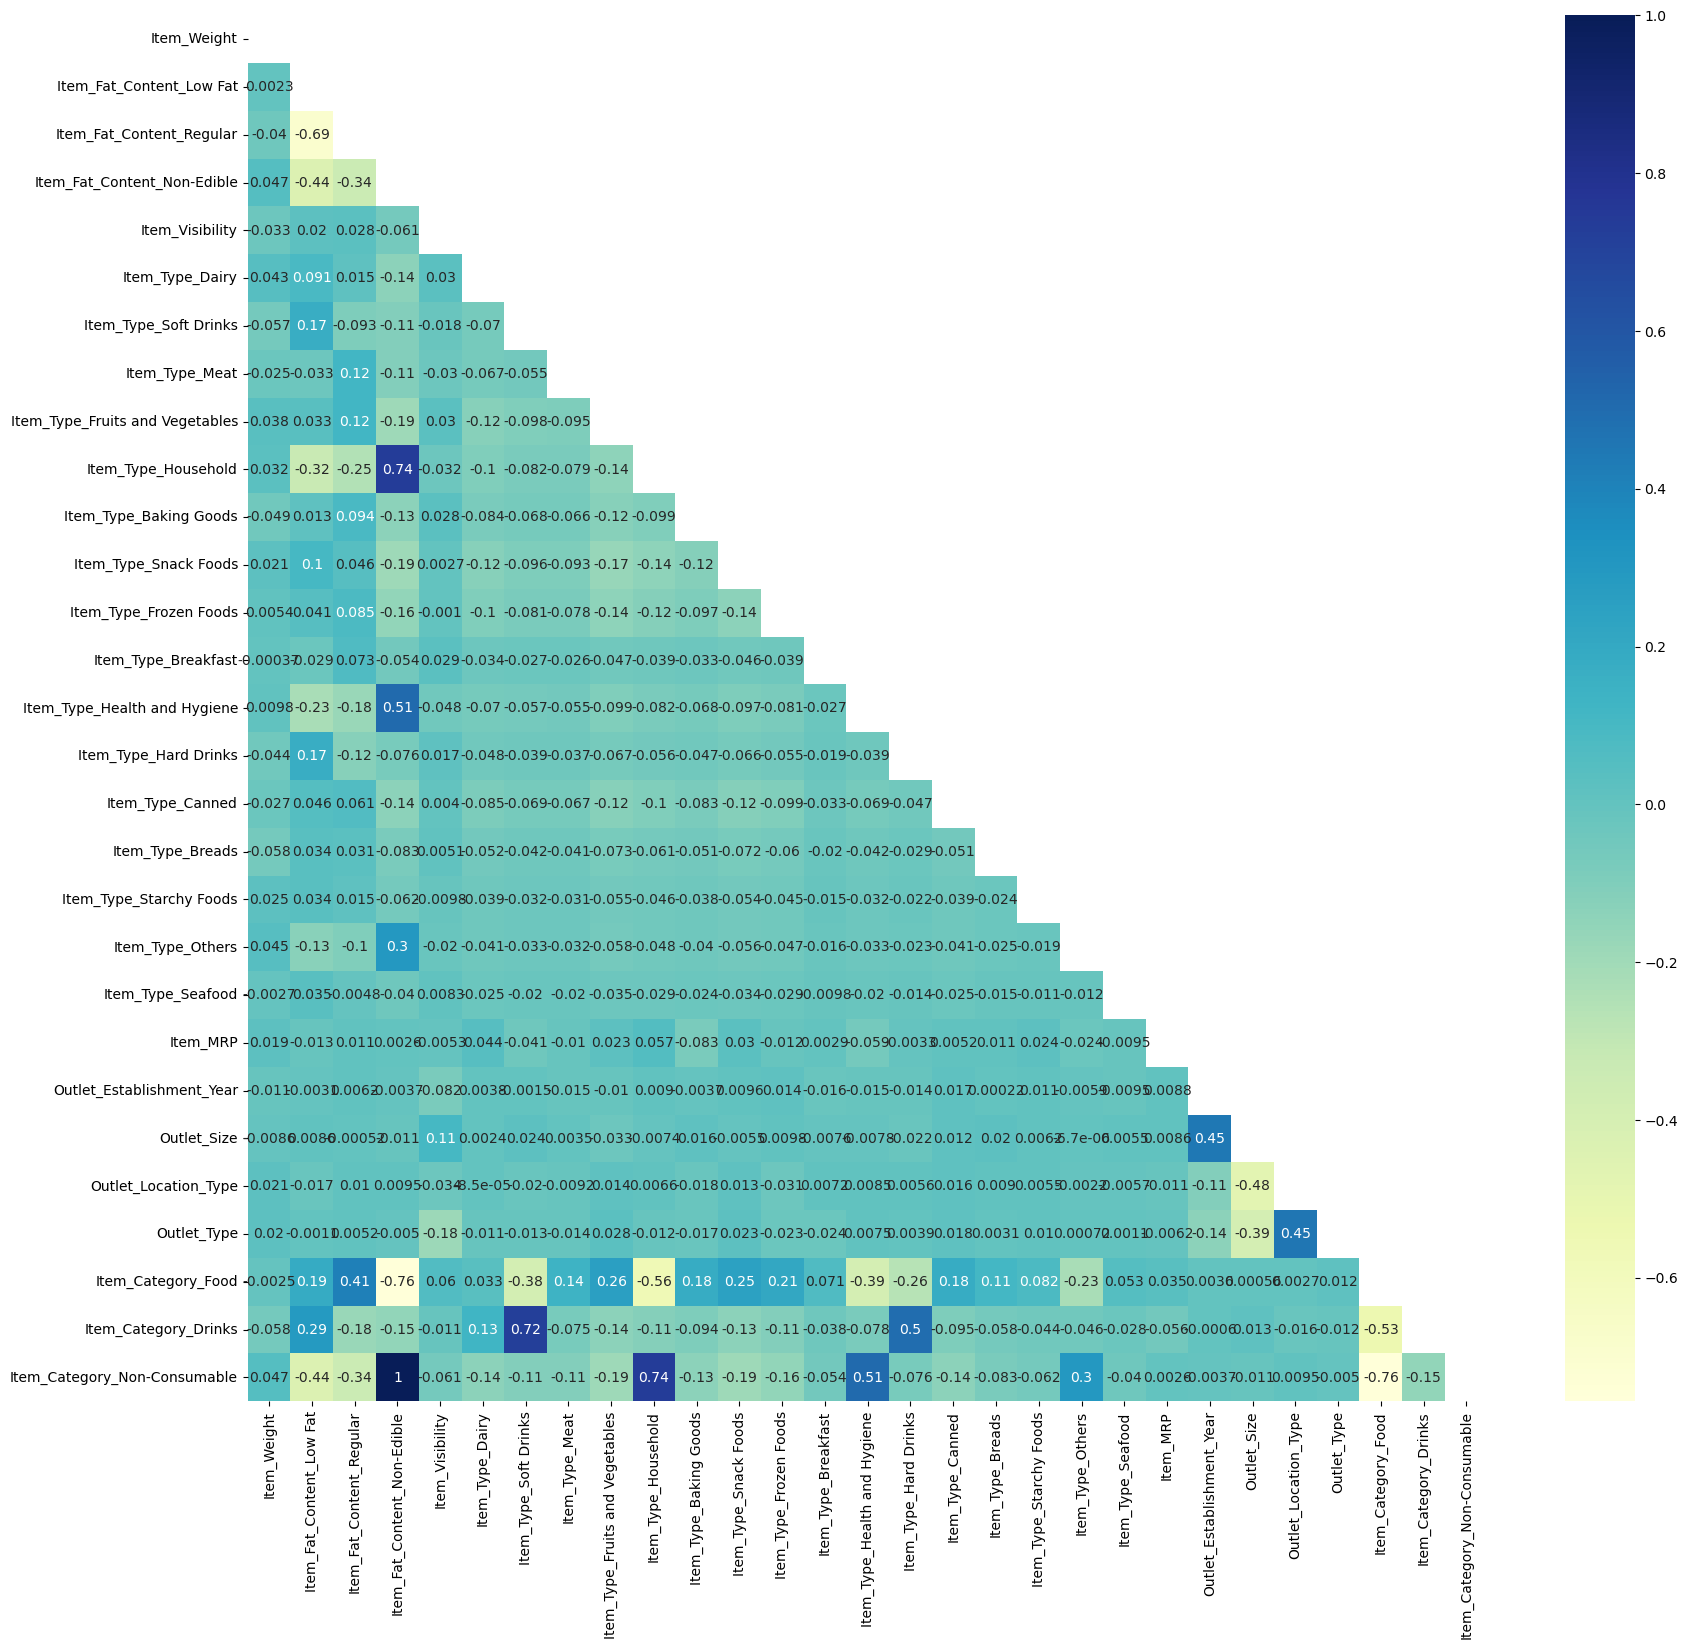

In [70]:
# find correlation between Independent and dependent attributes

plt.figure(figsize = (20,18))
mask = np.triu(np.ones_like(X.corr()))

sns.heatmap(X.corr(), annot = True, cmap ='YlGnBu',mask=mask)
plt.show()

Soft Drink and Item_Category_Drinks have high correlation

In [71]:
# deleting the unwated data
#finaldata= data.drop(['Item_Category_Drinks','Item_Category_Non-Consumable','Item_Category_Food'], 
#                     axis= 'columns')
#finaldata.info()

In [72]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [73]:
print(model.feature_importances_)

[0.05817525 0.01098378 0.01125098 0.00232295 0.06401954 0.0098965
 0.00493955 0.00686309 0.01297223 0.00493965 0.00683129 0.01171785
 0.00931071 0.00276913 0.00524791 0.00259707 0.00789144 0.00600487
 0.00535183 0.00212632 0.00204833 0.41632775 0.04375538 0.01867838
 0.01607033 0.2436448  0.00604029 0.00486479 0.002358  ]


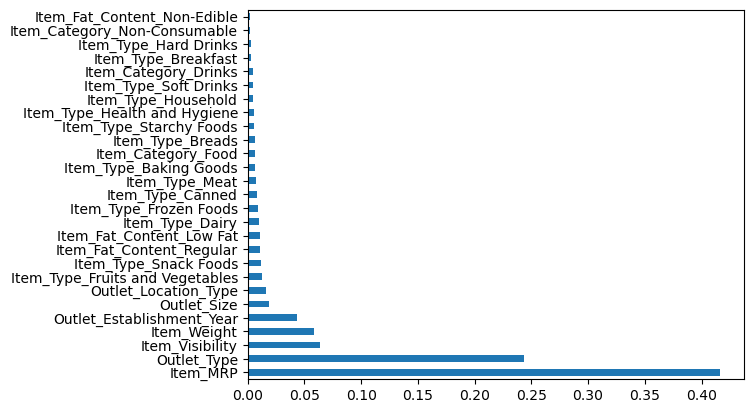

In [74]:
#plot graph of feature importances for better visualization
feat_importances =pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

#### Using the chi-test

In [75]:
#y_train.head(20)

In [76]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X,y.astype(np.int))

In [77]:
f_p_values

(array([4.18276599e+03, 1.33183768e+03, 1.60599665e+03, 2.00557257e+03,
        8.83699960e+01, 2.38165963e+03, 2.35216799e+03, 2.48878286e+03,
        2.02460439e+03, 2.22648161e+03, 2.19162301e+03, 2.15975040e+03,
        2.15385485e+03, 2.42437538e+03, 2.23380270e+03, 2.45097130e+03,
        2.43316261e+03, 2.71813203e+03, 2.82580341e+03, 1.86265801e+03,
        2.48179860e+03, 9.49246517e+04, 8.72018620e+01, 7.63309609e+02,
        1.37195769e+03, 1.61465366e+03, 6.84420489e+02, 2.26535804e+03,
        2.00557257e+03]),
 array([5.97032983e-104, 1.00000000e+000, 1.00000000e+000, 9.99999987e-001,
        1.00000000e+000, 4.23372896e-001, 5.93060149e-001, 4.25942580e-002,
        9.99999928e-001, 9.82301927e-001, 9.95786247e-001, 9.99109813e-001,
        9.99349628e-001, 2.09553959e-001, 9.76872465e-001, 1.17601383e-001,
        1.75274236e-001, 6.11117325e-007, 1.90357147e-010, 1.00000000e+000,
        5.22879381e-002, 0.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.0000

In [78]:
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values.sort_values(ascending=True)

Item_MRP                            0.000000e+00
Item_Weight                        5.970330e-104
Item_Type_Starchy Foods             1.903571e-10
Item_Type_Breads                    6.111173e-07
Item_Type_Meat                      4.259426e-02
Item_Type_Seafood                   5.228794e-02
Item_Type_Hard Drinks               1.176014e-01
Item_Type_Canned                    1.752742e-01
Item_Type_Breakfast                 2.095540e-01
Item_Type_Dairy                     4.233729e-01
Item_Type_Soft Drinks               5.930601e-01
Item_Category_Drinks                9.355575e-01
Item_Type_Health and Hygiene        9.768725e-01
Item_Type_Household                 9.823019e-01
Item_Type_Baking Goods              9.957862e-01
Item_Type_Snack Foods               9.991098e-01
Item_Type_Frozen Foods              9.993496e-01
Item_Type_Fruits and Vegetables     9.999999e-01
Item_Fat_Content_Non-Edible         1.000000e+00
Item_Category_Non-Consumable        1.000000e+00
Item_Type_Others    

<AxesSubplot:>

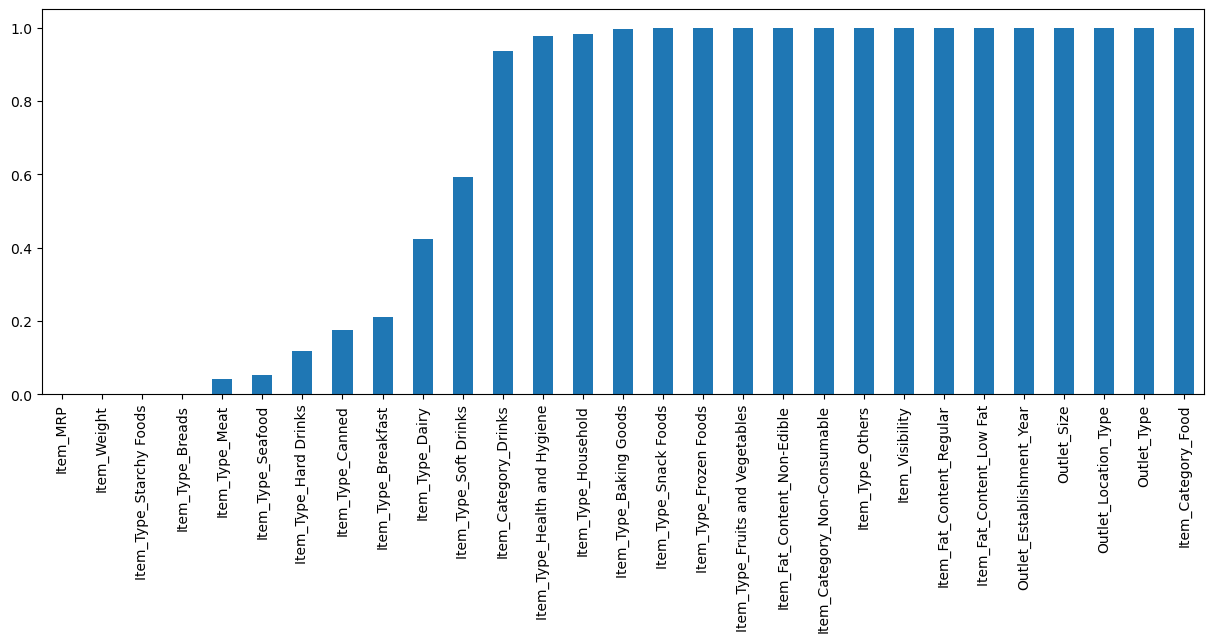

In [79]:
p_values.sort_values(ascending=True).plot.bar(figsize=(15,5))

In [80]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([2.25438280e-02, 1.57590678e-02, 2.25085502e-02, 1.21988722e-02,
       6.23825865e-02, 1.38322781e-02, 6.98617800e-03, 5.77339633e-03,
       0.00000000e+00, 1.65401323e-03, 2.52411881e-03, 6.78672237e-03,
       3.94744627e-03, 1.32020077e-03, 0.00000000e+00, 3.03667188e-03,
       1.16429803e-02, 2.13882734e-03, 4.97404574e-03, 3.28641257e-04,
       5.33410077e-03, 5.56845218e-01, 1.60444411e-01, 2.63516471e-02,
       2.10295384e-02, 2.58029481e-01, 1.21402778e-02, 9.42777651e-03,
       1.32129792e-02])

In [81]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Item_MRP                           0.556845
Outlet_Type                        0.258029
Outlet_Establishment_Year          0.160444
Item_Visibility                    0.062383
Outlet_Size                        0.026352
Item_Weight                        0.022544
Item_Fat_Content_Regular           0.022509
Outlet_Location_Type               0.021030
Item_Fat_Content_Low Fat           0.015759
Item_Type_Dairy                    0.013832
Item_Category_Non-Consumable       0.013213
Item_Fat_Content_Non-Edible        0.012199
Item_Category_Food                 0.012140
Item_Type_Canned                   0.011643
Item_Category_Drinks               0.009428
Item_Type_Soft Drinks              0.006986
Item_Type_Snack Foods              0.006787
Item_Type_Meat                     0.005773
Item_Type_Seafood                  0.005334
Item_Type_Starchy Foods            0.004974
Item_Type_Frozen Foods             0.003947
Item_Type_Hard Drinks              0.003037
Item_Type_Baking Goods          

<AxesSubplot:>

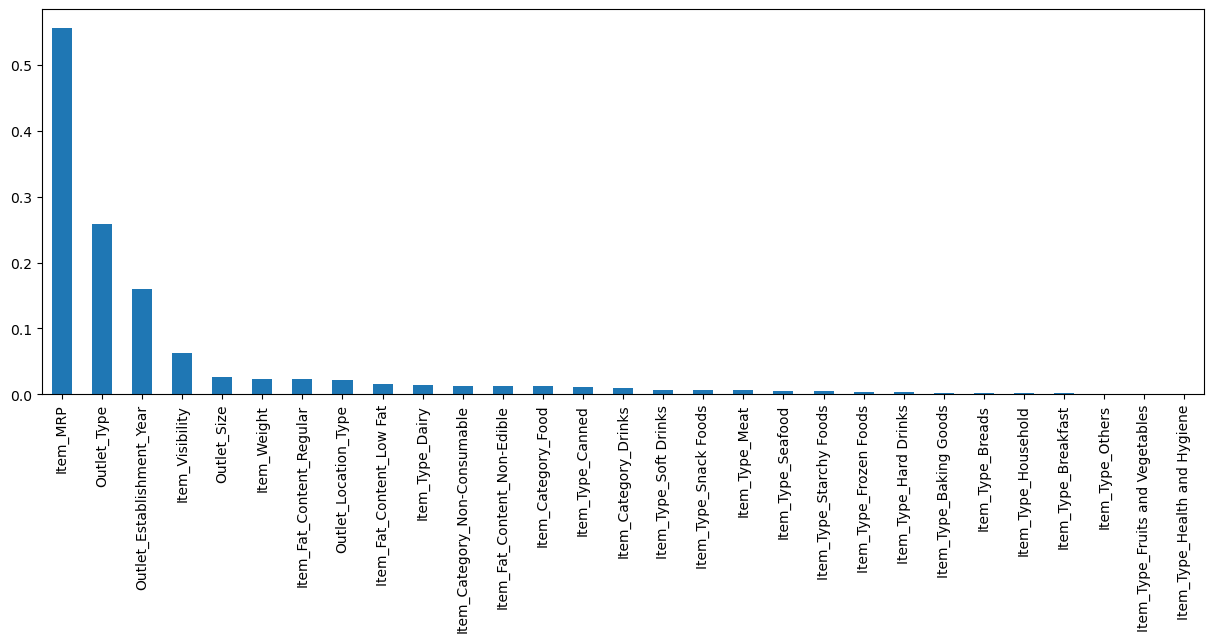

In [82]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In the above feature selection methods shows : 
Health and Hygiene, soft drinks,breakfast, others,hard drinks,Seafood are repeatedly showing up for dropping . So we are going to drop these values

In [83]:
# deleting the unwated data

#df= df.drop(['Item_Type_Health and Hygiene','Item_Type_Soft Drinks','Item_Type_Breakfast','Item_Type_Others','Item_Type_Hard Drinks','Item_Type_Seafood'], 
#                    axis= 'columns')
#df.info()

### Splitting our data into train and test

In [84]:
### It is always a good practice to split train and test data to avoid
#overfitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Item_Outlet_Sales'], axis=1),
    df['Item_Outlet_Sales'],
    test_size=0.3,
    random_state=0)

In [85]:
X_train.shape

(3294, 29)

### Standarization

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
sc=StandardScaler()

In [88]:
X_train_scaled  = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)

In [89]:
X_test_scaled 

array([[ 0.4437517 ,  1.06592062, -0.73531778, ...,  0.62017367,
        -0.32745517, -0.47000465],
       [-1.68045046,  1.06592062, -0.73531778, ...,  0.62017367,
        -0.32745517, -0.47000465],
       [ 0.11944603, -0.93815616,  1.35995624, ...,  0.62017367,
        -0.32745517, -0.47000465],
       ...,
       [ 1.0383121 , -0.93815616, -0.73531778, ..., -1.61245155,
        -0.32745517,  2.12763851],
       [-0.2481004 , -0.93815616,  1.35995624, ...,  0.62017367,
        -0.32745517, -0.47000465],
       [-0.81671635,  1.06592062, -0.73531778, ...,  0.62017367,
        -0.32745517, -0.47000465]])

### Machine Learning Model


In [90]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor


In [91]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [92]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "gb_regressor" : GradientBoostingRegressor()

}
model_list = []
r2_list =[]
accuracy_list =[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    score =r2_score(y_test,y_test_pred)*100
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print(" Accuracy of the model is %.2f" %score)

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_train_r2)
    accuracy_list.append(score)
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1190.8996
- Mean Absolute Error: 901.8848
- R2 Score: 0.5030
 Accuracy of the model is 51.40
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1203.1249
- Mean Absolute Error: 896.6340
- R2 Score: 0.5140


Lasso
Model performance for Training set
- Root Mean Squared Error: 1189.9173
- Mean Absolute Error: 901.7308
- R2 Score: 0.5038
 Accuracy of the model is 51.60
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1200.5791
- Mean Absolute Error: 895.2659
- R2 Score: 0.5160


Ridge
Model performance for Training set
- Root Mean Squared Error: 1189.8973
- Mean Absolute Error: 901.8385
- R2 Score: 0.5038
 Accuracy of the model is 51.59
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1200.7248
- Mean Absolute Error: 895.3976
- R2 Score: 0.5159


K-Neighbors Regressor
Model performan

In [93]:
pd.DataFrame(list(zip(model_list, r2_list,accuracy_list)), columns=['Model Name', 'R2_Score','Accuracy']).sort_values(by=["Accuracy"],ascending=False)


,Model Name,R2_Score,Accuracy
8,gb_regressor,0.651111,61.073547
5,Random Forest Regressor,0.933766,58.386572
6,XGBRegressor,0.924918,52.037320
1,Lasso,0.503774,51.603203
2,Ridge,0.503791,51.591456
0,Linear Regression,0.502955,51.397733
7,AdaBoost Regressor,0.432546,44.402174
3,K-Neighbors Regressor,0.597653,42.528002
4,Decision Tree,1.000000,25.438391


#### Random Forest Regressor

In [94]:
gb_regressor = GradientBoostingRegressor()
# Train the model using the training data
gb_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = gb_regressor.predict(X_test_scaled)

# Evaluate the model's performance using the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.6106891277328093


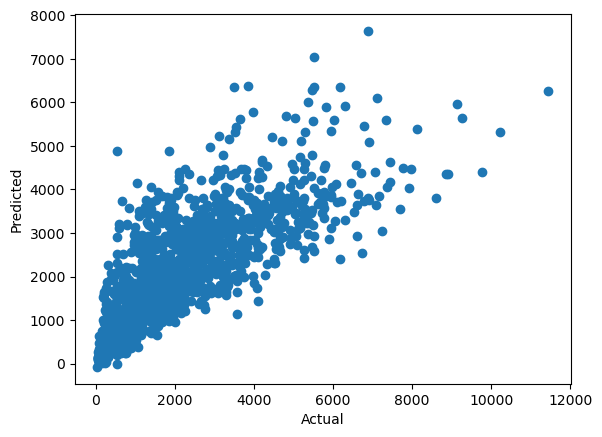

In [95]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

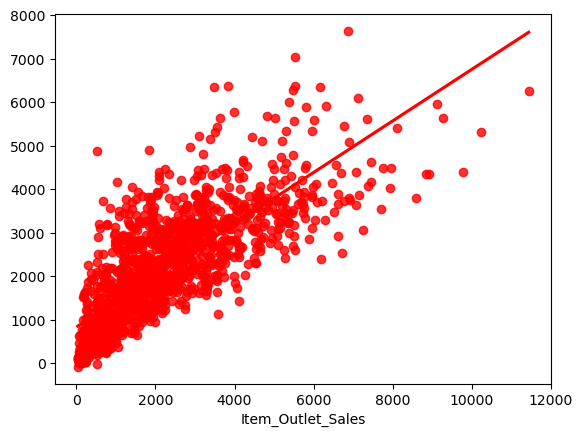

In [96]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [97]:
print("r2_score",r2_score(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))


r2_score 0.6106891277328093
mean_absolute_error 746.710242084156
mean_squared_error 1159475.1961009991


In [98]:
### Hypeparameters

n_estimators=[int(x) for x in np.linspace(start =100,stop =1200 , num =12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [99]:
# Randomized search CV

# number of trees in random forest
n_estimators =[int (x)for x in np.linspace(start =100,stop=1200,num=12)]
#number od features to consider at every split
max_features=['auto','sqrt']
# maximun numebr of levels in tree
max_depth = [int(x)for x in np.linspace(5,30,num =6)]
# max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
# create the random grid
random_grid ={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [102]:
#rf=RandomForestRegressor()

In [103]:
rf_random = RandomizedSearchCV(estimator = gb_regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [104]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [105]:
rf_random.best_score_

-1453056.7749569775

In [106]:
predictions=rf_random.predict(X_test_scaled)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

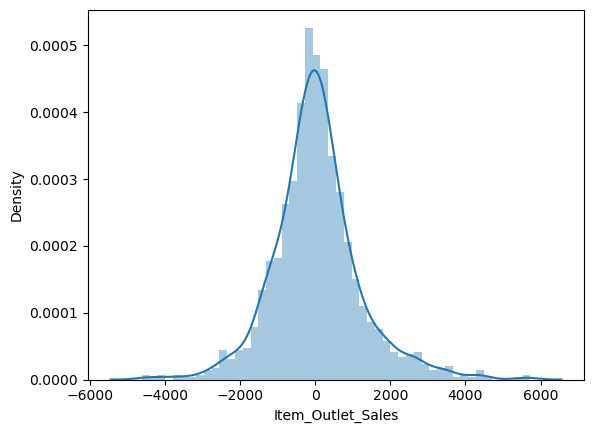

In [107]:
sns.distplot(y_test-predictions)

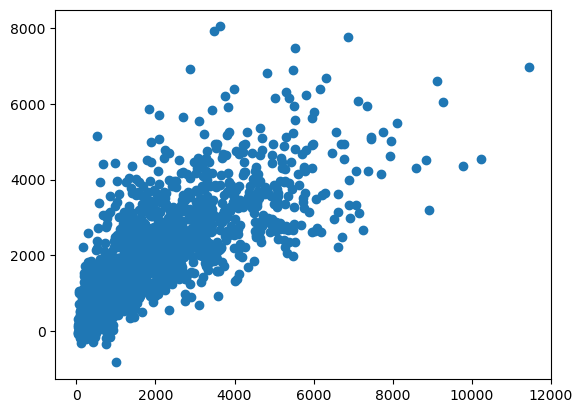

In [108]:
plt.scatter(y_test,predictions)

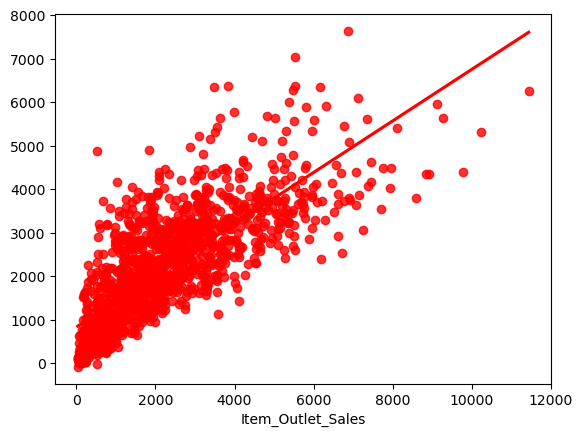

In [109]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [110]:
from sklearn import metrics

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R Squared : ", metrics.r2_score(y_test,predictions))

MAE: 834.7245780881772
MSE: 1386862.697591726
RMSE: 1177.6513480617793
R Squared :  0.5343404254529369


In [112]:
import pickle
# open a file, where you ant to store the data
file = open('GradientBoostingRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)